In [9]:
graphics_toolkit("gnuplot");

In [10]:
f = @(x) x - 1./x.^2;
a = 2;
b = 3;
x_mid = (a + b)/2;
epsilon = 1e-4;

f1 = @(x) 1 + 2./(x.^3);
f2 = @(x) -6./(x.^4);
f1(x_mid)
f2(x_mid)










ans = 1.1280

ans = -0.1536


In [11]:
n = 2;
while true
    x_nodes = linspace(a, b, n + 1);
    y_nodes = f(x_nodes);
    
    p = polyfit(x_nodes, y_nodes, n);
    p1 = polyder(p);
    
    L1_mid = polyval(p1, x_mid);
    R = abs(f1(x_mid) - L1_mid);
    
    fprintf('n = %d, погрешность = %.2e\n', n, R);
    
    if R <= epsilon
        fprintf('Точность достигнута при n = %d\n\n', n);
        break;
    else
        n = n + 1;
    end
end





















n = 2, погрешность = 1.09e-02
n = 3, погрешность = 7.25e-05
Точность достигнута при n = 3



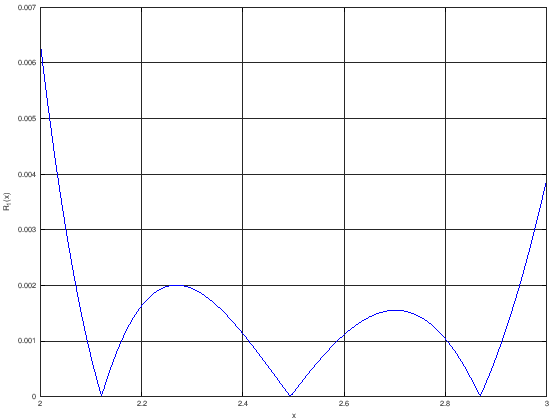

In [12]:
x_plot = linspace(a, b, 200);
R1_plot = abs(f1(x_plot) - polyval(p1, x_plot));

figure(1);
plot(x_plot, R1_plot, 'b-');
xlabel('x');
ylabel('R_1(x)');
grid on;

In [13]:
% Полином Лагранжа для n = 2, то что я аналитически делал
% Также вычислил погрешность ( аналатически у меня вышло ~0,0100888 )
% Проверил для n = 2
n = 2;
x_nodes = linspace(a, b, n + 1)
y_nodes = f(x_nodes)
p = polyfit(x_nodes, y_nodes, 2)
p1 = polyder(p)
L1_mid = polyval(p1, x_mid)
f1 = @(x) 1 + 2./(x.^3);
der1 = f1(x_mid)
R = abs(f1(x_mid) - L1_mid)

if R > epsilon
    fprintf('R > ε. Нужно увеличить n\n');
else
    fprintf('Точность достигнута!\n');
end






x_nodes =

   2.0000   2.5000   3.0000


y_nodes =

   1.7500   2.3400   2.8889


p =

  -0.082222   1.550000  -1.021111


p1 =

  -0.1644   1.5500


L1_mid = 1.1389


der1 = 1.1280

R = 0.010889






R > ε. Нужно увеличить n


In [14]:
m = n;
while true
    x_nodes = linspace(a, b, m + 1);
    y_nodes = f(x_nodes);
    
    p = polyfit(x_nodes, y_nodes, m);
    p2 = polyder(polyder(p));
    
    L2_mid = polyval(p2, x_mid);
    R2 = abs(f2(x_mid) - L2_mid);
    
    fprintf('m = %d, погрешность 2й производной = %.2e\n', m, R2);
    
    if R2 <= epsilon
        fprintf('Точность для 2й производной достигнута при m = %d\n', m);
        break;
    else
        m = m + 1;
    end
end

R2_plot = abs(f2(x_plot) - polyval(p2, x_plot));





















m = 2, погрешность 2й производной = 1.08e-02
m = 3, погрешность 2й производной = 1.21e-02
m = 4, погрешность 2й производной = 1.53e-04
m = 5, погрешность 2й производной = 2.55e-04
m = 6, погрешность 2й производной = 1.57e-06
Точность для 2й производной достигнута при m = 6




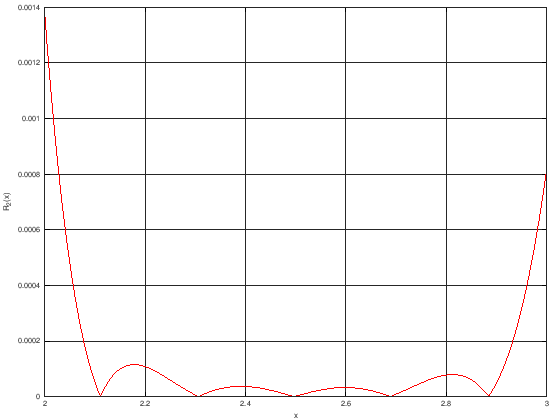

In [15]:
figure(2);
plot(x_plot, R2_plot, 'r-');
xlabel('x');
ylabel('R_2(x)');
grid on;

In [16]:
% Полином для m = 3, как видно он не подошел
m = 3;
x_nodes = linspace(a, b, m + 1)
y_nodes = f(x_nodes)
p = polyfit(x_nodes, y_nodes, m)
p2 = polyder(polyder(p))
f2 = @(x) -6./(x.^4);
der2 = f2(x_mid)
L2_mid = polyval(p2, x_mid)
R2 = abs(f2(x_mid) - L2_mid)

epsilon = 1e-4;

if R2 > epsilon
    fprintf('R > ε. Нужно увеличить m\n');
else
    fprintf('Точность достигнута!\n');
end




x_nodes =

   2.0000   2.3333   2.6667   3.0000


y_nodes =

   1.7500   2.1497   2.5260   2.8889


p =

   0.043846  -0.411671   2.364176  -1.682433


p2 =

   0.2631  -0.8233



der2 = -0.1536

L2_mid = -0.1657

R2 = 0.012057








R > ε. Нужно увеличить m
